In [1]:
import acquire

In [2]:
import os
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = acquire.get_all_data(use_cache=True)

In [4]:
df.head()

,item_id,sale_amount,sale_date,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253


1.Convert date column to datetime format.

In [5]:
df['sale_date'] = pd.to_datetime(df['sale_date'])

2. Plot the distribution of sale_amount and item_price.

Text(0.5, 1.0, 'The distribution of sale amount over time')

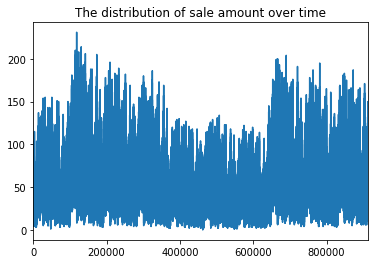

In [6]:
df.sale_amount.plot().set_title('The distribution of sale amount over time')

Text(0.5, 1.0, 'The distribution of item price over time')

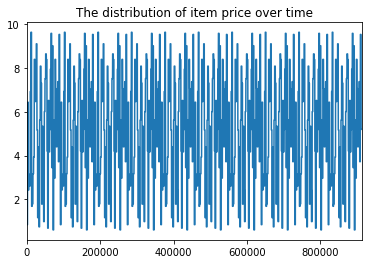

In [7]:
df.item_price.plot().set_title('The distribution of item price over time')

3.Set the index to be the datetime variable.

In [8]:
df = df.sort_values('sale_date').set_index('sale_date')

In [9]:
df.head()

,item_id,sale_amount,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode
sale_date,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2013-01-01 00:00:00+00:00,17,26.0,295813,3,Ducal,Ducal Refried Red Beans,1.16,88313590791,88313590791,2118 Fredericksburg Rdj,San Antonio,TX,78201
2013-01-01 00:00:00+00:00,7,32.0,125995,10,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004,8503 NW Military Hwy,San Antonio,TX,78231
2013-01-01 00:00:00+00:00,18,45.0,314073,3,Scotch,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,21200725340,21200725340,2118 Fredericksburg Rdj,San Antonio,TX,78201
2013-01-01 00:00:00+00:00,19,34.0,332333,3,Careone,Careone Family Comb Set - 8 Ct,0.74,41520035646,41520035646,2118 Fredericksburg Rdj,San Antonio,TX,78201


4.Add a 'month' and 'day of week' column to your dataframe, derived from the index using the keywords for those date parts.

In [10]:
df["month"] = df.index.month_name()

In [11]:
df["day_of_week"] = df.index.day_name()

In [12]:
df.head(1)

,item_id,sale_amount,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,month,day_of_week
sale_date,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,January,Tuesday


5.Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [13]:
df['sales_total'] = df.sale_amount * df.item_price

In [14]:
df.head(1)

,item_id,sale_amount,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,January,Tuesday,10.92


6.Using pandas.DataFrame.diff() function, create a new column that is the result of the current sales - the previous days sales.

In [15]:
sales_total = df.resample("D")[['sales_total']].sum()
sales_total['sales_differences'] = sales_total['sales_total'].diff()
sales_total.head(5)

,sales_total,sales_differences
sale_date,,
2013-01-01 00:00:00+00:00,73844.01,NaN
2013-01-02 00:00:00+00:00,73570.58,-273.43
2013-01-03 00:00:00+00:00,78169.48,4598.90
2013-01-04 00:00:00+00:00,84467.73,6298.25
2013-01-05 00:00:00+00:00,87621.85,3154.12


7. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [16]:
# def prep_sales_data():
#     df = acquire.get_all_data(use_cache=True)
#     df['sale_date'] = pd.to_datetime(df['sale_date'])
#     df.sale_amount.plot().set_title('The distribution of sale amount over time')
#     df.item_price.plot().set_title('The distribution of item price over time')
#     df = df.sort_values('sale_date').set_index('sale_date')
#     df["month"] = df.index.month_name()
#     df["day_of_week"] = df.index.day_name()
#     df['sales_total'] = df.sale_amount * df.item_price
#     return df.head()

In [19]:
def diff_between_sales():
    sales_total = df.resample("D")[['sales_total']].sum()
    sales_total['sales_differences'] = sales_total['sales_total'].diff()
    return sales_total.head()

Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:


In [20]:
ops = acquire.get_opsd_data()

In [21]:
ops.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [22]:
ops.shape

(4383, 5)

In [23]:
ops.dtypes

Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

In [24]:
ops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
Date           4383 non-null object
Consumption    4383 non-null float64
Wind           2920 non-null float64
Solar          2188 non-null float64
Wind+Solar     2187 non-null float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


1. Convert date column to datetime format.

In [25]:
ops['Date'] = pd.to_datetime(ops['Date'])

In [26]:
ops.head(3)

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN


2. Plot the distribution of each of your variables.

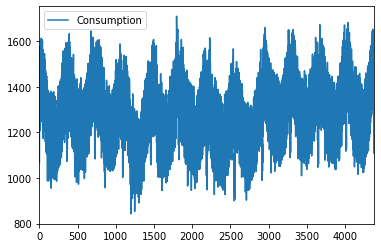

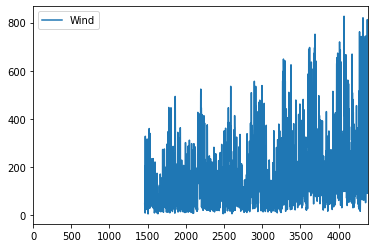

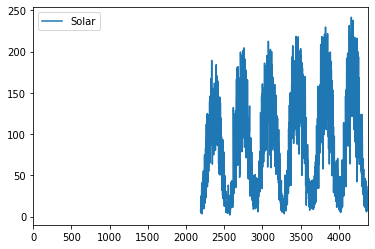

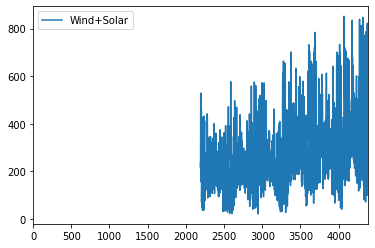

In [27]:
ops[['Consumption']].plot()
ops[['Wind']].plot()
ops[['Solar']].plot()
ops[['Wind+Solar']].plot()

3. Set the index to be the datetime variable.

In [28]:
ops = ops.sort_values('Date').set_index('Date')

In [29]:
ops.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


4. Add a month and a year column to your dataframe.

In [30]:
ops['month'] = ops.index.month

In [31]:
ops['year'] = ops.index.year

In [32]:
ops.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,1,2006
2006-01-02,1380.521,NaN,NaN,NaN,1,2006
2006-01-03,1442.533,NaN,NaN,NaN,1,2006
2006-01-04,1457.217,NaN,NaN,NaN,1,2006
2006-01-05,1477.131,NaN,NaN,NaN,1,2006


In [33]:
def prep_ops():
    ops = acquire.get_opsd_data()
    ops['Date'] = pd.to_datetime(ops['Date'])
    ops = ops.sort_values('Date').set_index('Date')
    ops['month'] = ops.index.month
    ops['year'] = ops.index.year
    return ops

Install and use the vega_datasets for the next exercise

In [40]:
from vega_datasets import data
df = data.sf_temps()
df.head(10)

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00
5,45.8,2010-01-01 05:00:00
6,45.9,2010-01-01 06:00:00
7,45.9,2010-01-01 07:00:00
8,46.4,2010-01-01 08:00:00
9,48.0,2010-01-01 09:00:00


In [41]:
df = df.set_index('date')

In [42]:
df.head(3)

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9


1 Resample by the day and take the average temperature. Visualize the average temperature over time.

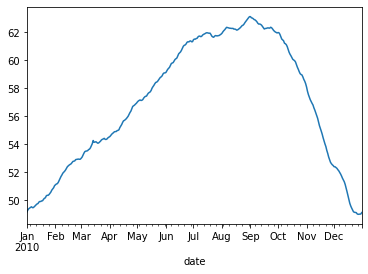

In [43]:
df.temp.resample("D").mean().plot()

2. Write the code necessary to visualize the minimum temperature over time

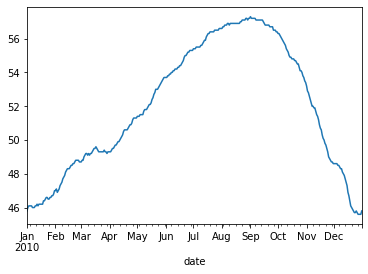

In [44]:
df.temp.resample("D").min().plot()

3. Write the code necessary to visualize the maximum temperature over time

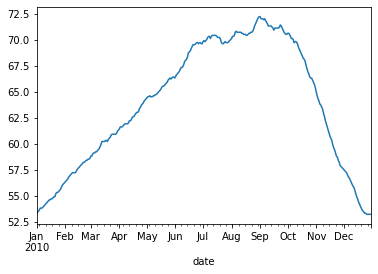

In [45]:
df.temp.resample("D").max().plot()

4. Which month is the coldest, on average?

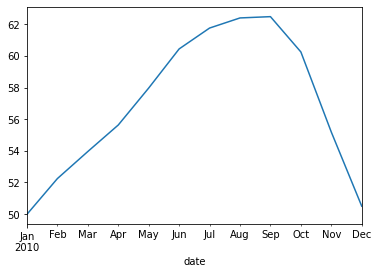

In [50]:
df.temp.resample("M").mean().plot()

In [51]:
df.temp.resample("M").mean().min()

49.984139784946244

5. Which month has the highest average temperature?

In [52]:
df.temp.resample("M").mean().max()

62.48708333333335

6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [53]:
temp = pd.DataFrame(data=df.temp.resample("D").agg(['min', 'max']))

In [54]:
temp['diff'] = (temp['max'] - temp['min'])
temp.head()

,min,max,diff
date,,,
2010-01-01,45.8,53.3,7.5
2010-01-02,46.0,53.4,7.4
2010-01-03,46.1,53.5,7.4
2010-01-04,46.1,53.6,7.5
2010-01-05,46.1,53.8,7.7


In [58]:
temp['diff'].resample("M").mean()

date
2010-01-31     8.341935
2010-02-28     9.485714
2010-03-31    10.854839
2010-04-30    12.320000
2010-05-31    12.909677
2010-06-30    13.950000
2010-07-31    13.977419
2010-08-31    13.870968
2010-09-30    14.403333
2010-10-31    13.432258
2010-11-30    10.236667
2010-12-31     7.925806
Freq: M, Name: diff, dtype: float64

In [60]:
temp['diff'].resample("M").mean().max()

14.40333333333333

Use the Vega_Datasets to work with the flights_20k data

In [84]:
df = data.flights_20k()

In [85]:
df.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


In [86]:
df.shape

(20000, 5)

In [87]:
df.dtypes

date           datetime64[ns]
delay                   int64
distance                int64
origin                 object
destination            object
dtype: object

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
date           20000 non-null datetime64[ns]
delay          20000 non-null int64
distance       20000 non-null int64
origin         20000 non-null object
destination    20000 non-null object
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 781.4+ KB


- Convert any negative delays to 0.

In [89]:
df = df.set_index('date')

In [90]:
df.head()

,delay,distance,origin,destination
date,,,,
2001-01-13 14:56:00,32,417,SAN,SJC
2001-01-31 16:40:00,-5,1093,FLL,ISP
2001-02-11 18:39:00,3,293,LBB,DAL
2001-01-10 21:00:00,-15,550,MSY,MCO
2001-03-30 21:45:00,-2,229,STL,IND


In [94]:
df.delay = np.where(df.delay < 0, 0, df.delay)

In [95]:
df.head()

,delay,distance,origin,destination
date,,,,
2001-01-13 14:56:00,32,417,SAN,SJC
2001-01-31 16:40:00,0,1093,FLL,ISP
2001-02-11 18:39:00,3,293,LBB,DAL
2001-01-10 21:00:00,0,550,MSY,MCO
2001-03-30 21:45:00,0,229,STL,IND


- Which hour of the day has the highest average delay?

In [98]:
df['hour'] = df.index.hour

In [104]:
df.groupby('hour').delay.mean().sort_values().tail(1)

hour
3    302.5
Name: delay, dtype: float64

- Does the day of the week make a difference in the delay amount?

In [105]:
df['day_of_week'] = df.index.day_name()

In [106]:
df.head()

,delay,distance,origin,destination,hour,day_of_week
date,,,,,,
2001-01-13 14:56:00,32,417,SAN,SJC,14,Saturday
2001-01-31 16:40:00,0,1093,FLL,ISP,16,Wednesday
2001-02-11 18:39:00,3,293,LBB,DAL,18,Sunday
2001-01-10 21:00:00,0,550,MSY,MCO,21,Wednesday
2001-03-30 21:45:00,0,229,STL,IND,21,Friday


In [109]:
df.groupby('day_of_week').delay.mean()

day_of_week
Friday       17.757596
Monday        7.165772
Saturday      8.431498
Sunday       10.413542
Thursday     12.821322
Tuesday       9.410866
Wednesday    11.032478
Name: delay, dtype: float64

- Does the month make a difference in the delay amount?

In [111]:
df['month'] = df.index.month

In [112]:
df.head(1)

,delay,distance,origin,destination,hour,day_of_week,month
date,,,,,,,
2001-01-13 14:56:00,32,417,SAN,SJC,14,Saturday,1


In [113]:
df.groupby('month').delay.mean()

month
1    11.301592
2    12.306106
3     9.875287
Name: delay, dtype: float64